<a href="https://colab.research.google.com/github/JoshiGaurav11/SelfLearningMLforChem/blob/main/SMILES_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Workflow

*   Data cleaning and preprocessing
  *   Molecular Featurization
      * **Molecule representation**
*   Feature extraction
*   Building a model (training, validating and testing)


# Molecule representation

`(S. Raghunathan, U. D. Priyakumar, Int. J. Quantum Chem. 2022, 122(7), e26870 https://doi.org/10.1002/qua.26870)`

There are three key invariance of physical systems those are preferably captured by a common molecular descriptor. Formally, these are as follows:

1.   Rotational invariance: Representation must by invariant upon a rotation operation.
2.   Translational invariance: Representation must by unchanged upon a translation in space.
3.   Permutation invariance: Representation must by unaltered due to the change in the particular order of the atoms.

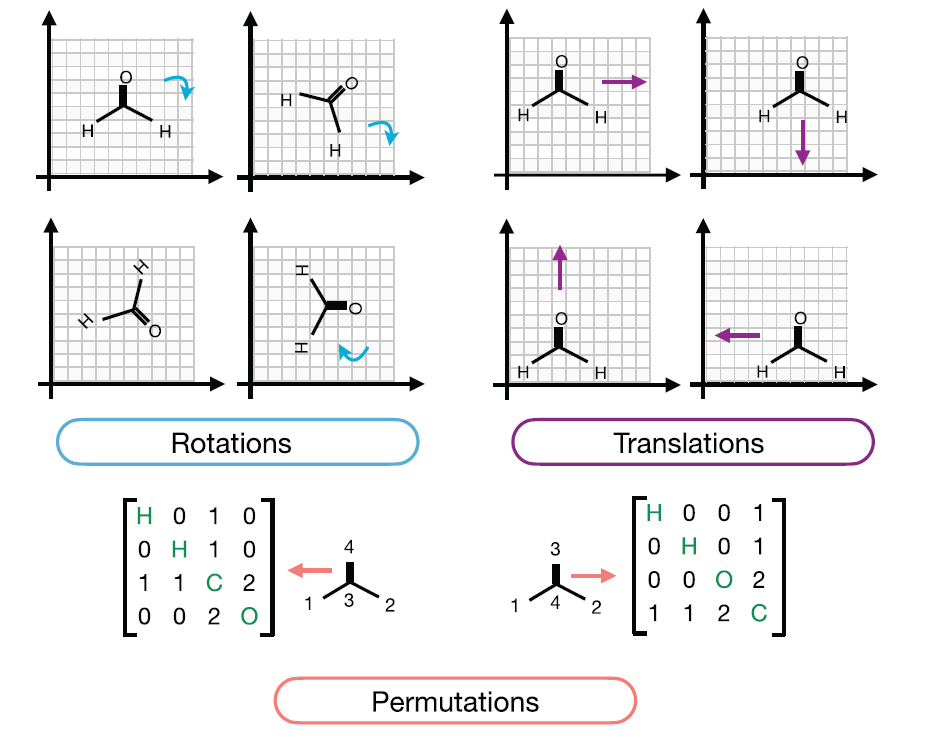



# Simplified molecular input line entry system representation (SMILES)

References:
1. https://www.youtube.com/watch?v=_UbmThglFL4&t=3s&ab_channel=MachineLearninginChemistryfromScratch

2. https://www.daylight.com/dayhtml_tutorials/languages/smiles/index.html#ATOM

SMILES represent a valence model of molecule. It consists of a series of characters containing no spaces.

# Rules for encoding SMILES

# Atoms

a) Represented by their symbol, enclosed in square brackets, [ ].


In [ ]:
!pip install rdkit-pypi
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd
from rdkit import DataStructs #used for storing, manipulating, and comparing fingerprints; for Tanimoto similarity.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 29.7 MB/s eta 0:00:00


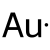

In [ ]:
Au=Chem.MolFromSmiles('[Au]')
Draw.MolToImage(Au,size=(50,50))

b) Elements in the "organic subset" may be written without brackets if the number of attached hydrogens conforms to the lowest normal valence consistent with explicit bonds:
B(3), C(4), N(3,5), O(2), P(3,5), S(2,4,6), F(1), Cl(1), Br(1), I(1)

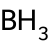

In [ ]:
B=Chem.MolFromSmiles('B')
Draw.MolToImage(B,size=(50,50))

c) * is wildcard (any atom). The wildcard atom may also be written without brackets.

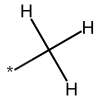

In [ ]:
dummy_F=Chem.MolFromSmiles('*C')
dummy_F_withH=Chem.AddHs(dummy_F)
Draw.MolToImage(dummy_F_withH,size=(100,100))

# Properties of atoms

a) Brackets are required whenever atomic properties (including chirality) are specified. Charge is specified by sign followed by digits.

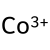

In [ ]:
Cobalt_plus3=Chem.MolFromSmiles('[Co+3]')
Draw.MolToImage(Cobalt_plus3,size=(50,50))

b) Hydrogen count is an atomic property and may be specified by including an H (and optionally an integer) after the Atomic Symbol. Hydrogens are not normally considered atoms. These Hydrogens are often referred to as "implicit" Hydrogens

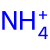

In [ ]:
Ammonium=Chem.MolFromSmiles('[NH4+]')
Draw.MolToImage(Ammonium, size=(50,50))

c) Atomic mass is specified by including an integer before the Atomic Symbol. Default mass is "unspecified".  

[14:33:33] unsupported number of radical electrons 4


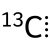

In [ ]:
C13=Chem.MolFromSmiles('[13C]')
Draw.MolToImage(C13,size=(50,50))

# Bonds

a) Single bonds are denoted by '-'. It may be omitted.

b) Double bonds are denoted by an equals sign `='

c) Triple bonds are denoted by a pound sign `#'.

d) Delocalised bonds are denoted by ':'

e) The "dot" is a "non-bond", "disconnect", or "zero-order" bond.


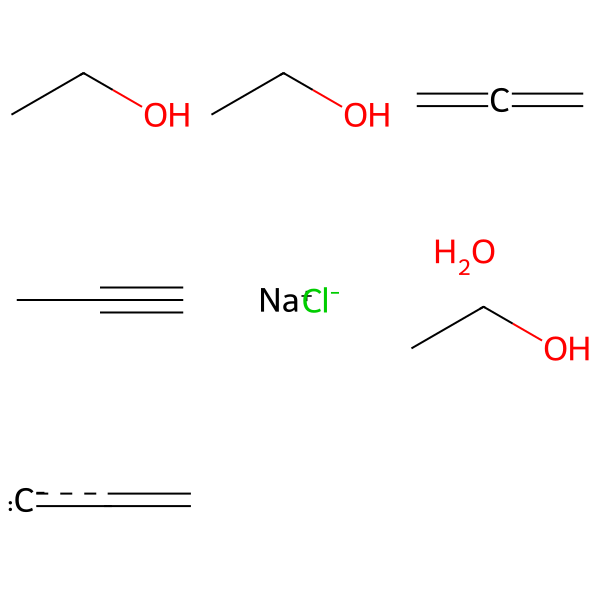

In [ ]:
#print more than one molecule
test_smiles = ['C-C-O','CCO', 'C=C=C', 'C#CC', '[Na+].[Cl-]', 'CCO.O', '[C-]:C=C']
test_mols= [Chem.MolFromSmiles(smi) for smi in test_smiles]
#test_mols_withH=[Chem.AddHs(mol) for mol in test_mols]
Draw.MolsToGridImage(test_mols, useSVG=False) # useSVG=False renders PNG image in notebook. Can be omitted if SVG is fine.

# Branching

Branching is shown inside parenthesis, and can be nested or stacked.

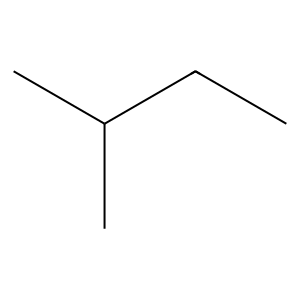

In [ ]:
# 2-methyl butane
MeButane= Chem.MolFromSmiles('CC(C)CC')
Draw.MolToImage(MeButane)

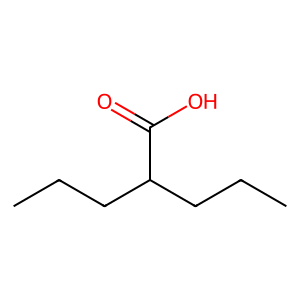

In [ ]:
# 4-heptanoic acid
hept=Chem.MolFromSmiles('CCCC(C(=O)O)CCC')
Draw.MolToImage(hept)

# Cyclic structures

Ring closure is specified by breaking bonds and numerically labeling (with the same number) the atoms that were connected to each other.

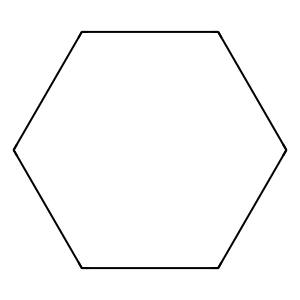

In [ ]:
# cyclohexane
cyclohexane=Chem.MolFromSmiles('C2CCCCC2')
Draw.MolToImage(cyclohexane)

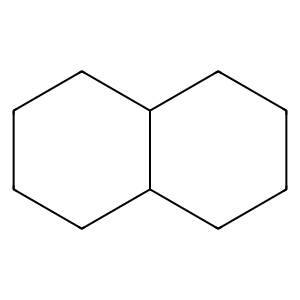

In [ ]:
# Condensed rings
decalin=Chem.MolFromSmiles('C1CCC2CCCCC2C1')
Draw.MolToImage(decalin)
#decalin_2=Chem.MolFromSmiles('C12CCCCC1CCCC2')
#Draw.MolToImage(decalin_2)

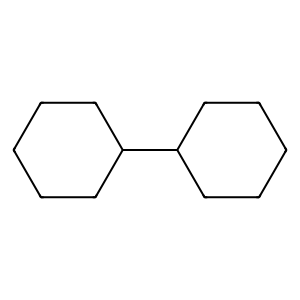

In [ ]:
# Bicyclohexane
Bcy=Chem.MolFromSmiles('C1CCCCC1C2CCCCC2')
#Bcy=Chem.MolFromSmiles('C1(CCCCC1)C2(CCCCC2)')
Draw.MolToImage(Bcy)

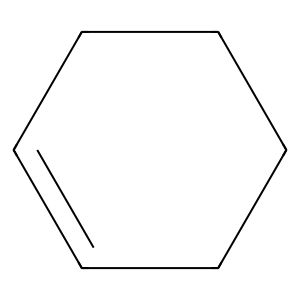

In [ ]:
# Cyclohexene
Che=Chem.MolFromSmiles('C1CC=CCC1')
Draw.MolToImage(Che)

# Aromaticity

Aromatic atoms may be specified by using lower case letters. Only the following atoms may be interpreted as aromatic:
C,  N,  P,  O,  S,  As,  Se,  and  *  (wildcard atom)

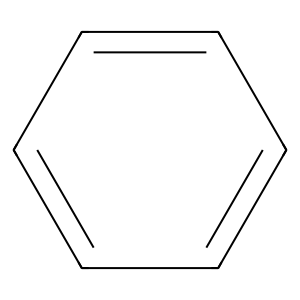

In [ ]:
# Benznene
Bz=Chem.MolFromSmiles('c1ccccc1')
#Bz=Chem.MolFromSmiles('c1:c:c:c:c:c1')
#BzH=Chem.AddHs(Bz)
Draw.MolToImage(Bz)

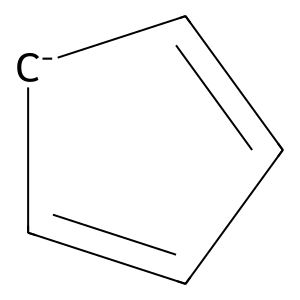

In [ ]:
#cyclopentadienyl anion
Cp=Chem.MolFromSmiles('c1c[CH-]cc1')
#Cp=Chem.MolFromSmiles('[CH-]1cccc1')
Draw.MolToImage(Cp)

# Stereo Isomerism

E and Z type isomerism can be specified using the
'/' and '\\\' characters. Double bond orientation may be unspecified. (e.g. CC=CC )

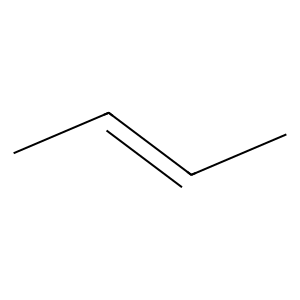

In [ ]:
# trans-2-butene
transbutene=Chem.MolFromSmiles('C/C=C/C')
Draw.MolToImage(transbutene)

Tetrahedral chirality can be specified using the '@' character (anticlockwise) or two `@' characters (clockwise). Looking FROM the 1st neighbor
listed in the SMILES TO the chiral atom, the other three neighbors appear anticlockwise or clockwise in the order listed.

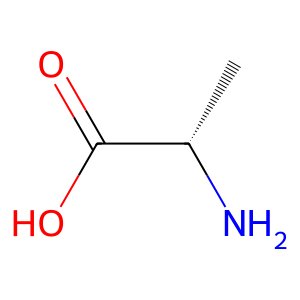

In [ ]:
# R-alanine
Rala=Chem.MolFromSmiles('N[C@@H](C)C(=O)O')
#try=Chem.MolFromSmiles('O[C@@](S)(C(=O)(O))(C)')
#Lala_withH=Chem.AddHs(Lala)
Draw.MolToImage(Rala)

# Substructure Search


In [ ]:
test_smiles = ['C-C-O','CCO', 'C=C=C', 'C#CC', '[Na+].[Cl-]', 'CCO.O', '[C-]:C=C']
test_mol=[]
for smi in test_smiles:
  mol=Chem.MolFromSmiles(smi)
  test_mol.append(mol)
pattern=Chem.MolFromSmiles('CO')
for mol in test_mol:
  print(mol.HasSubstructMatch(pattern))


True
True
False
False
False
True
False


# Fingerprints and Tanimoto Similarity

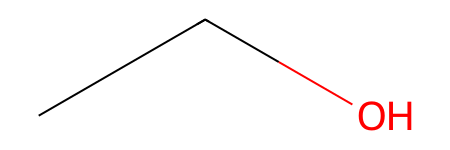

In [ ]:
ethanol=test_mol[0]
ethanol

In [ ]:
bi={} #Define bi as an empty dictionary to store bit information
fp= AllChem.GetMorganFingerprintAsBitVect(ethanol,1,nBits=1024,bitInfo=bi)
fp_arr=np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits()) # returns a list containg the indices of bits that are set to 1 in fingerprint

[33, 80, 222, 294, 386, 807]

In [ ]:
print(bi)

{33: ((0, 0),), 80: ((1, 0),), 222: ((2, 1),), 294: ((0, 1),), 386: ((1, 1),), 807: ((2, 0),)}


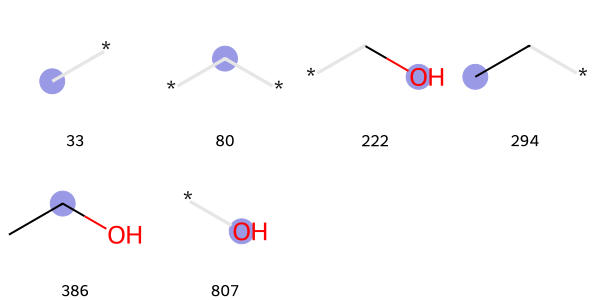

In [ ]:
prints=[(ethanol, x, bi) for x in fp.GetOnBits()]
#prints
Draw.DrawMorganBits(prints,molsPerRow=4, legends=[str(x) for x in fp.GetOnBits()])

# Reactions

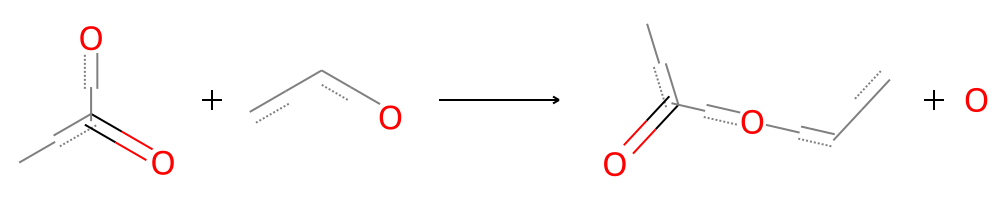

In [ ]:
from rdkit.Chem import rdChemReactions
# Define the reaction SMILES
#reaction_smiles = 'CC(=O)O.OCC>[H+].[Cl-].OCC>CC(=O)OCC'
reaction_smiles = 'CC(=O)O.OCC>>CC(=O)OCC.O'
# Create a reaction object from the SMILES string
rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles)
# Generate an image of the reaction using rdChemReactions.ReactionToImage

img = Draw.ReactionToImage(rxn) # Use Draw.ReactionToImage to draw the reaction
img
